<a href="https://colab.research.google.com/github/bhartikapoor9634/Computer_Vision_Projects/blob/main/Traffic_sign_Project_CNN_and_VGG_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sun Nov 27 09:29:58 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']="/content/"

In [ ]:
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

 98% 597M/612M [00:02<00:00, 290MB/s]
100% 612M/612M [00:02<00:00, 262MB/s]


In [ ]:
import zipfile
! unzip "gtsrb-german-traffic-sign.zip" 

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [ ]:
import numpy as np
import pandas as pd
import cv2

import random
from matplotlib.image import imread

import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from PIL import Image

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from matplotlib import style
import keras

from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential, Model

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Activation,Concatenate, BatchNormalization


In [ ]:
#Setting images path
data_path = '/content'
train_path = '/content/Train'
test_path = '/content/Test'

# Resizing images
image_height = 32
image_width = 32
chnls = 3

In [ ]:
#Storing Number of categories
num_classes = len(os.listdir(train_path))
num_classes

43

In [ ]:
#Overview of Labels
lables = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

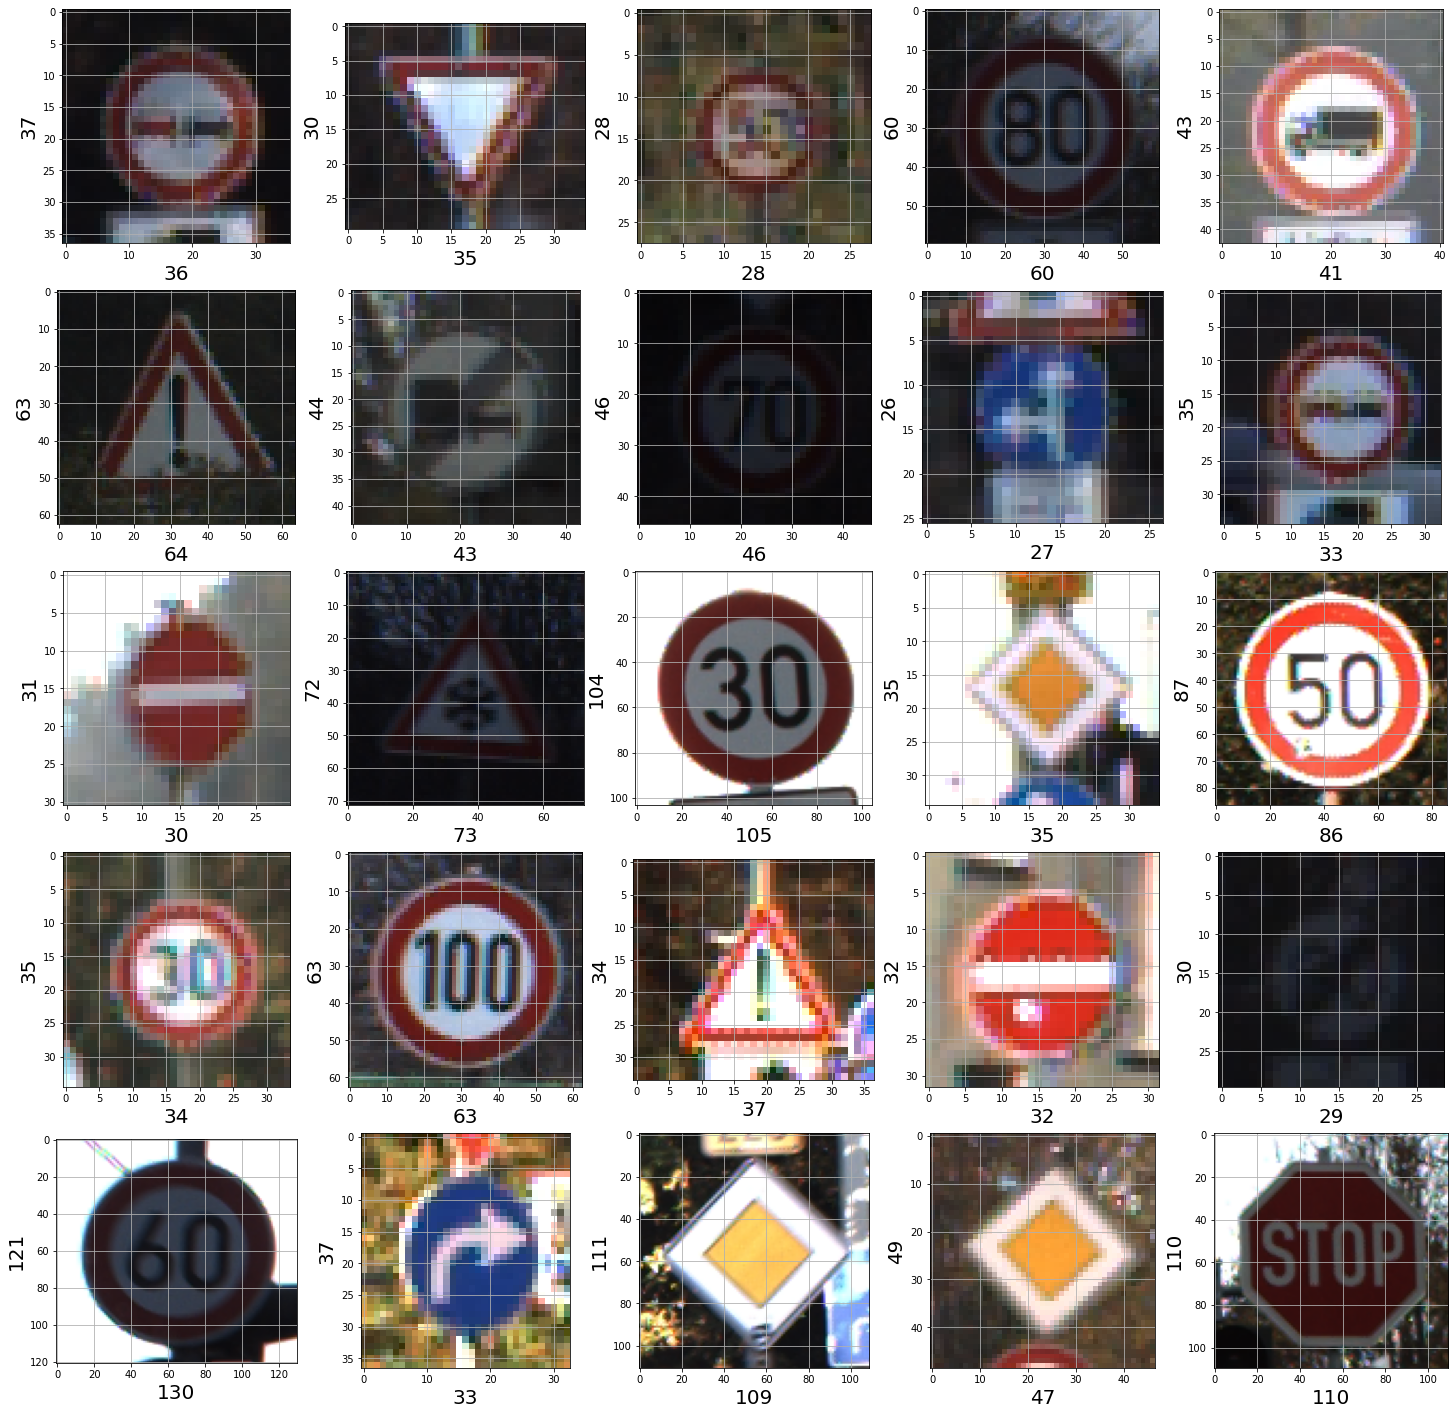

In [ ]:
# Visualizing 25 random images from test data
test = pd.read_csv(data_path + '/Test.csv')
imgs_path = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    rand_img_path = data_path + '/' + random.choice(imgs_path)
    rand_image = imread(rand_img_path)
    plt.imshow(rand_image)
    
    plt.grid(b=None)
    plt.xlabel(rand_image.shape[1], fontsize = 20)
    plt.ylabel(rand_image.shape[0], fontsize = 20)



# **Collecting the Training Data**

In [ ]:
img_data = []
img_labels = []

for i in range(num_classes):
    train_data_path = data_path + '/Train/' + str(i)
    train_images = os.listdir(train_data_path)

    for img in train_images:
        
        try:
            image = cv2.imread(train_data_path + '/' + img)
            array_image = Image.fromarray(image, 'RGB')
            resized_image = array_image.resize((image_height, image_width))
            img_data.append(np.array(resized_image))
            img_labels.append(i)
        
        except:
            print("Error in " + img)


img_data = np.array(img_data)
img_labels = np.array(img_labels)

print(img_data.shape, img_labels.shape)

(39209, 32, 32, 3) (39209,)


# **Shuffling the training data**

In [ ]:
shfl_idxs = np.arange(img_data.shape[0])
np.random.shuffle(shfl_idxs)
img_data = img_data[shfl_idxs]
img_labels = img_labels[shfl_idxs]

# **Splitting the data into train and validation set**

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(img_data, img_labels, test_size=0.2, random_state=42, shuffle=True)

train_x = train_x/255 
val_x = val_x/255

print("Shape of input training data is:", train_x.shape)
print("Shape of input validating data is:", val_x.shape)
print("Shape of output training data is:", train_y.shape)
print("Shape of output validating data is:", val_y.shape)

Shape of input training data is: (31367, 32, 32, 3)
Shape of input validating data is: (7842, 32, 32, 3)
Shape of output training data is: (31367,)
Shape of output validating data is: (7842,)


# **One hot encoding the labels**

In [ ]:
train_y = keras.utils.to_categorical(train_y, num_classes)
val_y = keras.utils.to_categorical(val_y, num_classes)

print(train_y.shape)
print(val_y.shape)

(31367, 43)
(7842, 43)


# **Making the model**

In [ ]:
cnn_model = Sequential()    

cnn_model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(image_height,image_width,chnls)))
cnn_model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn_model.add(layers.MaxPool2D(pool_size=(2, 2)))
cnn_model.add(BatchNormalization(axis=-1))

cnn_model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
cnn_model.add(layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu'))
cnn_model.add(layers.MaxPool2D(pool_size=(2, 2)))
cnn_model.add(BatchNormalization(axis=-1))

cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(1024, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.3))

cnn_model.add(layers.Dense(43, activation='softmax'))

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 512)       5

In [ ]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# **Training the model**

In [ ]:
history = cnn_model.fit(train_x, train_y, batch_size=32, epochs=15, validation_data=(val_x, val_y))

Epoch 1/15
981/981 [==============================] - 23s 13ms/step - loss: 0.2655 - accuracy: 0.9304 - val_loss: 0.0458 - val_accuracy: 0.9874
Epoch 2/15
981/981 [==============================] - 12s 12ms/step - loss: 0.0398 - accuracy: 0.9888 - val_loss: 0.1079 - val_accuracy: 0.9700
Epoch 3/15
981/981 [==============================] - 12s 12ms/step - loss: 0.0231 - accuracy: 0.9934 - val_loss: 0.0253 - val_accuracy: 0.9926
Epoch 4/15
981/981 [==============================] - 12s 12ms/step - loss: 0.0327 - accuracy: 0.9905 - val_loss: 0.0208 - val_accuracy: 0.9950
Epoch 5/15
981/981 [==============================] - 12s 12ms/step - loss: 0.0212 - accuracy: 0.9943 - val_loss: 0.0320 - val_accuracy: 0.9920
Epoch 6/15
981/981 [==============================] - 11s 11ms/step - loss: 0.0240 - accuracy: 0.9931 - val_loss: 0.0367 - val_accuracy: 0.9899
Epoch 7/15
981/981 [==============================] - 11s 11ms/step - loss: 0.0113 - accuracy: 0.9964 - val_loss: 0.0162 - val_accuracy:

# **Evaluating the model**

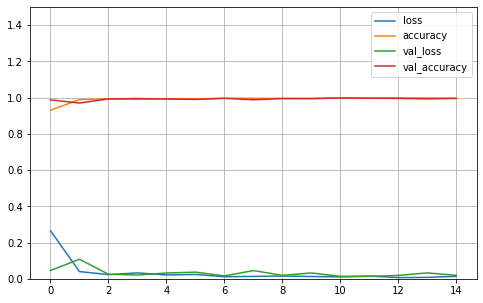

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.5)
plt.show()

# **Loading the test data and running the predictions**

In [ ]:
#making predictions with the test data
test = pd.read_csv(data_path + '/Test.csv')

classes = test["ClassId"].values
images = test["Path"].values

test_data =[]

for img in images:
    try:
        image = cv2.imread(data_path + '/' +img)
        test_img_arr = Image.fromarray(image, 'RGB')
        test_img_resize = test_img_arr.resize((image_height, image_width))
        test_data.append(np.array(test_img_resize))
    
    except:
        print("Error in " + img)

test_x = np.array(test_data)
test_x = test_x/255

pred_cnn=cnn_model.predict(test_x) 
pred_classes=np.argmax(pred_cnn,axis=1)

#Calculating Accuracy with the test data
print('Accuracy with the Testing Data: ',accuracy_score(classes, pred_classes)*100)

395/395 [==============================] - 2s 6ms/step
Accuracy with the Testing Data:  97.513855898654


# **Visualizing the confusion matrix**

In [ ]:
cf_cnn = confusion_matrix(classes, pred_classes)

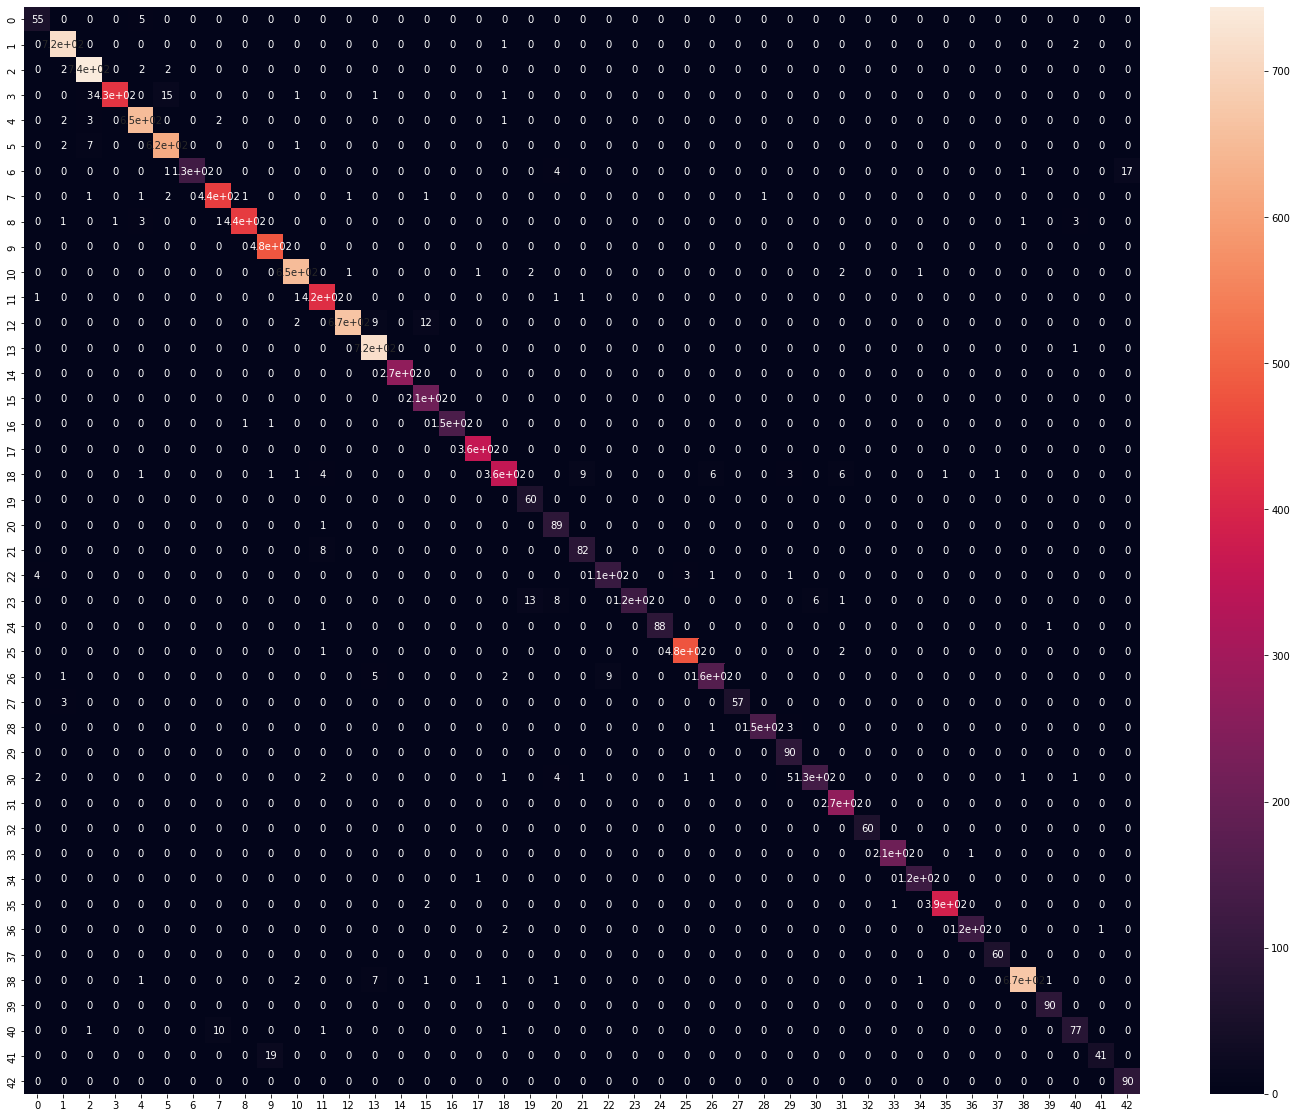

In [ ]:
df_cm_cnn = pd.DataFrame(cf_cnn, index = lables,  columns = lables)
plt.figure(figsize = (25,20))
sns.heatmap(df_cm_cnn, annot=True)
plt.savefig("Conf_matrix_CNN.png")

# **Classification report**

In [ ]:
print(classification_report(classes, pred_classes))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90        60
           1       0.98      1.00      0.99       720
           2       0.98      0.99      0.99       750
           3       1.00      0.95      0.98       450
           4       0.98      0.99      0.98       660
           5       0.97      0.98      0.98       630
           6       1.00      0.85      0.92       150
           7       0.97      0.98      0.98       450
           8       1.00      0.98      0.99       450
           9       0.96      1.00      0.98       480
          10       0.99      0.99      0.99       660
          11       0.96      0.99      0.97       420
          12       1.00      0.97      0.98       690
          13       0.97      1.00      0.98       720
          14       1.00      1.00      1.00       270
          15       0.93      1.00      0.96       210
          16       1.00      0.99      0.99       150
          17       0.99    

# **Predictions on Test Data**

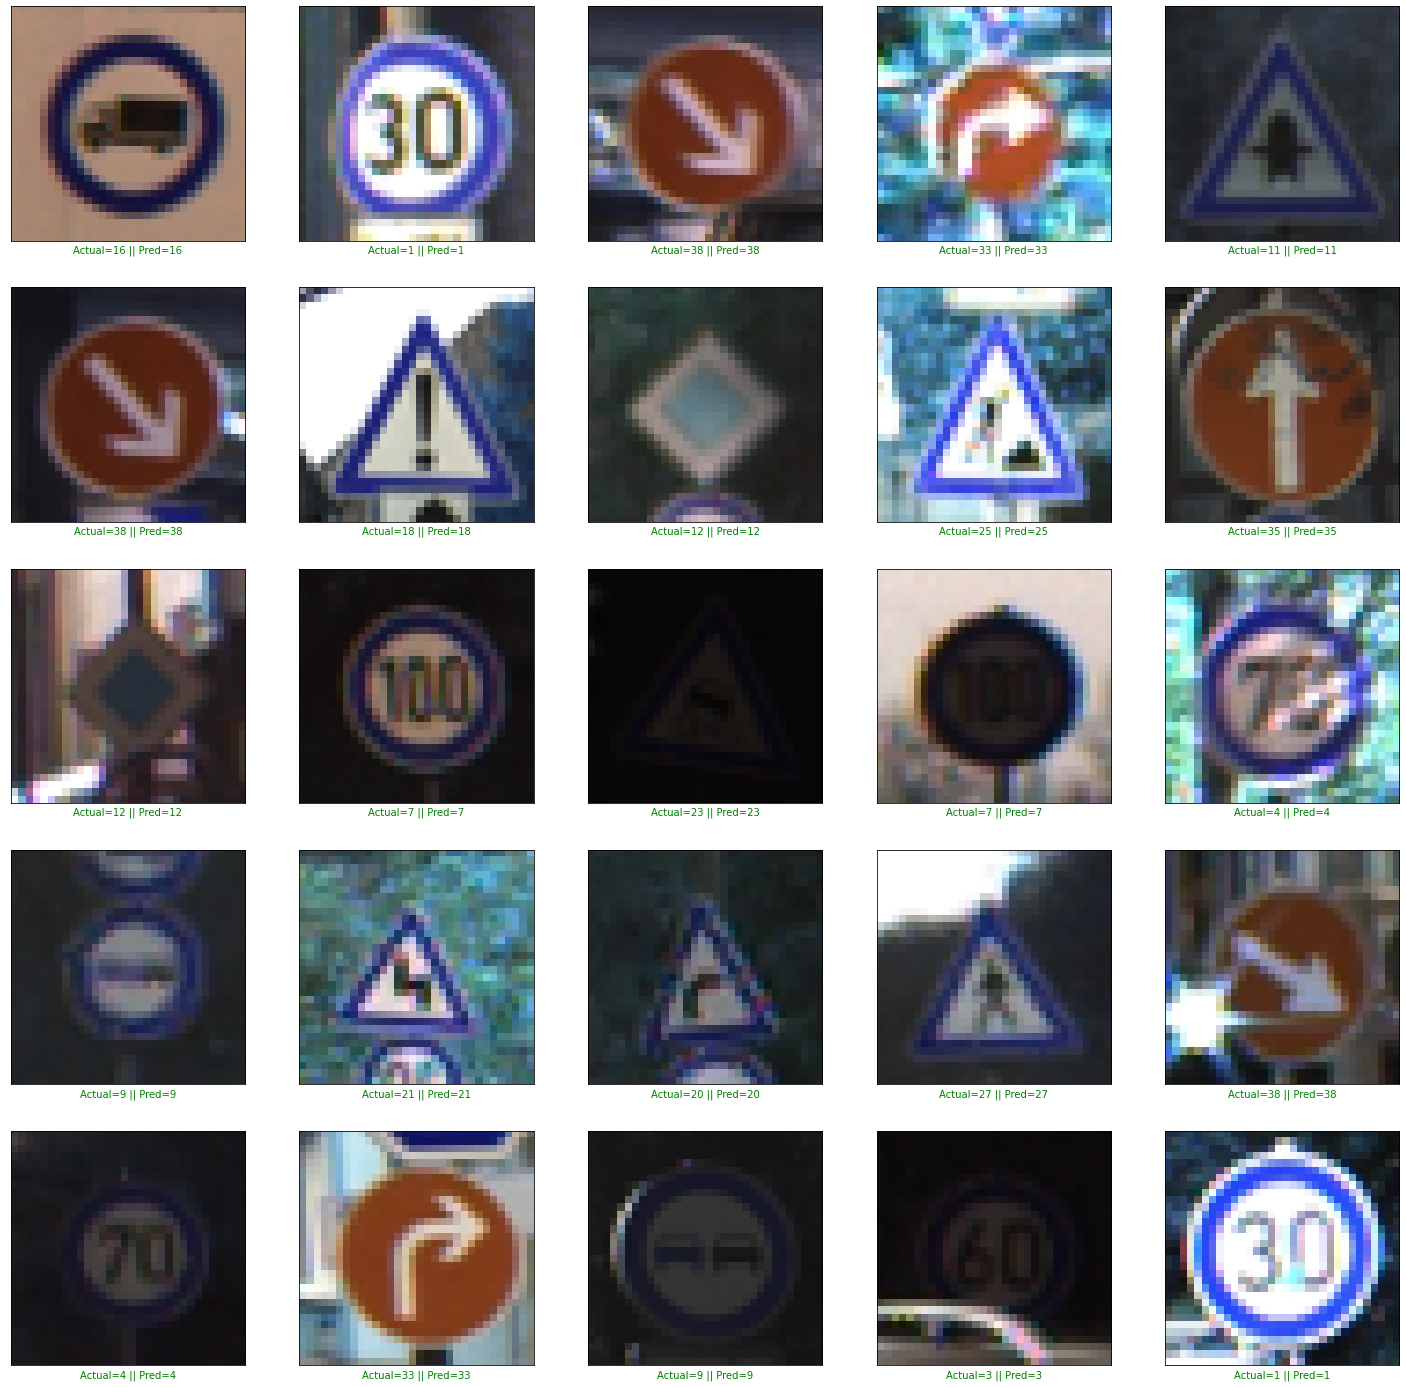

In [ ]:
#Predictions of Test data using CNN model
plt.figure(figsize = (25, 25))

start_idx = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred_y = pred_classes[start_idx + i]
    actual_y = classes[start_idx + i]
    color = 'g'
    if pred_y != actual_y:
        color = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual_y, pred_y), color = color)
    plt.imshow(test_x[start_idx + i])
plt.show()


# **VGG**

# **Building Model**

In [ ]:
#VGG16
vgg_base_mdl=VGG16(input_shape=(32,32,3) , weights='imagenet' , include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
for layers in vgg_base_mdl.layers:
  layers.trainable=False

In [ ]:
vgg_model = vgg_base_mdl.output
vgg_model = GlobalAveragePooling2D()(vgg_model)

vgg_model = Dense(128,activation='relu')(vgg_model)
vgg_model = Dropout(0.15)(vgg_model)
vgg_model = Dense(43,activation='softmax')(vgg_model)

vgg_model = Model(inputs=vgg_base_mdl.input,outputs=vgg_model)
vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
vgg_model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [ ]:
history_vgg = vgg_model.fit(train_x, train_y , batch_size = 32, validation_data = (val_x, val_y),
                     epochs = 15)

Epoch 1/15
981/981 [==============================] - 13s 12ms/step - loss: 1.9514 - accuracy: 0.4221 - val_loss: 1.4385 - val_accuracy: 0.5632
Epoch 2/15
981/981 [==============================] - 12s 12ms/step - loss: 1.3227 - accuracy: 0.5841 - val_loss: 1.1631 - val_accuracy: 0.6501
Epoch 3/15
981/981 [==============================] - 12s 12ms/step - loss: 1.1003 - accuracy: 0.6527 - val_loss: 0.9971 - val_accuracy: 0.6896
Epoch 4/15
981/981 [==============================] - 12s 12ms/step - loss: 0.9595 - accuracy: 0.6928 - val_loss: 0.8876 - val_accuracy: 0.7303
Epoch 5/15
981/981 [==============================] - 13s 13ms/step - loss: 0.8605 - accuracy: 0.7241 - val_loss: 0.8049 - val_accuracy: 0.7487
Epoch 6/15
981/981 [==============================] - 11s 12ms/step - loss: 0.7860 - accuracy: 0.7473 - val_loss: 0.7325 - val_accuracy: 0.7692
Epoch 7/15
981/981 [==============================] - 11s 12ms/step - loss: 0.7204 - accuracy: 0.7660 - val_loss: 0.6957 - val_accuracy:

# **Evaluating the model**

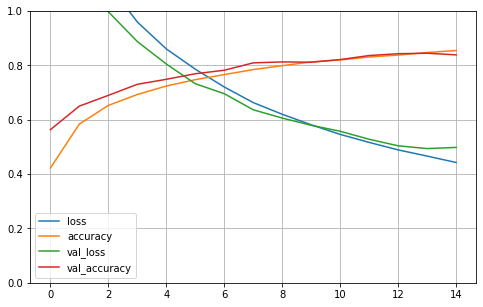

In [ ]:
pd.DataFrame(history_vgg.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

 # **Loading the test data and running the predictions**

In [ ]:
#Predictions on test data using Vgg model
pred_vgg=vgg_model.predict(test_x) 
pred_vgg_classes=np.argmax(pred_vgg,axis=1)


#Calculating accuracy on test data
print('Test Data accuracy with Vgg model is: ',accuracy_score(classes, pred_vgg_classes)*100)

395/395 [==============================] - 3s 8ms/step
Test Data accuracy with Vgg model is:  56.777513855898654


# **Visualizing Confusion Matrix**

In [ ]:
cf_vgg = confusion_matrix(classes, pred_vgg_classes)

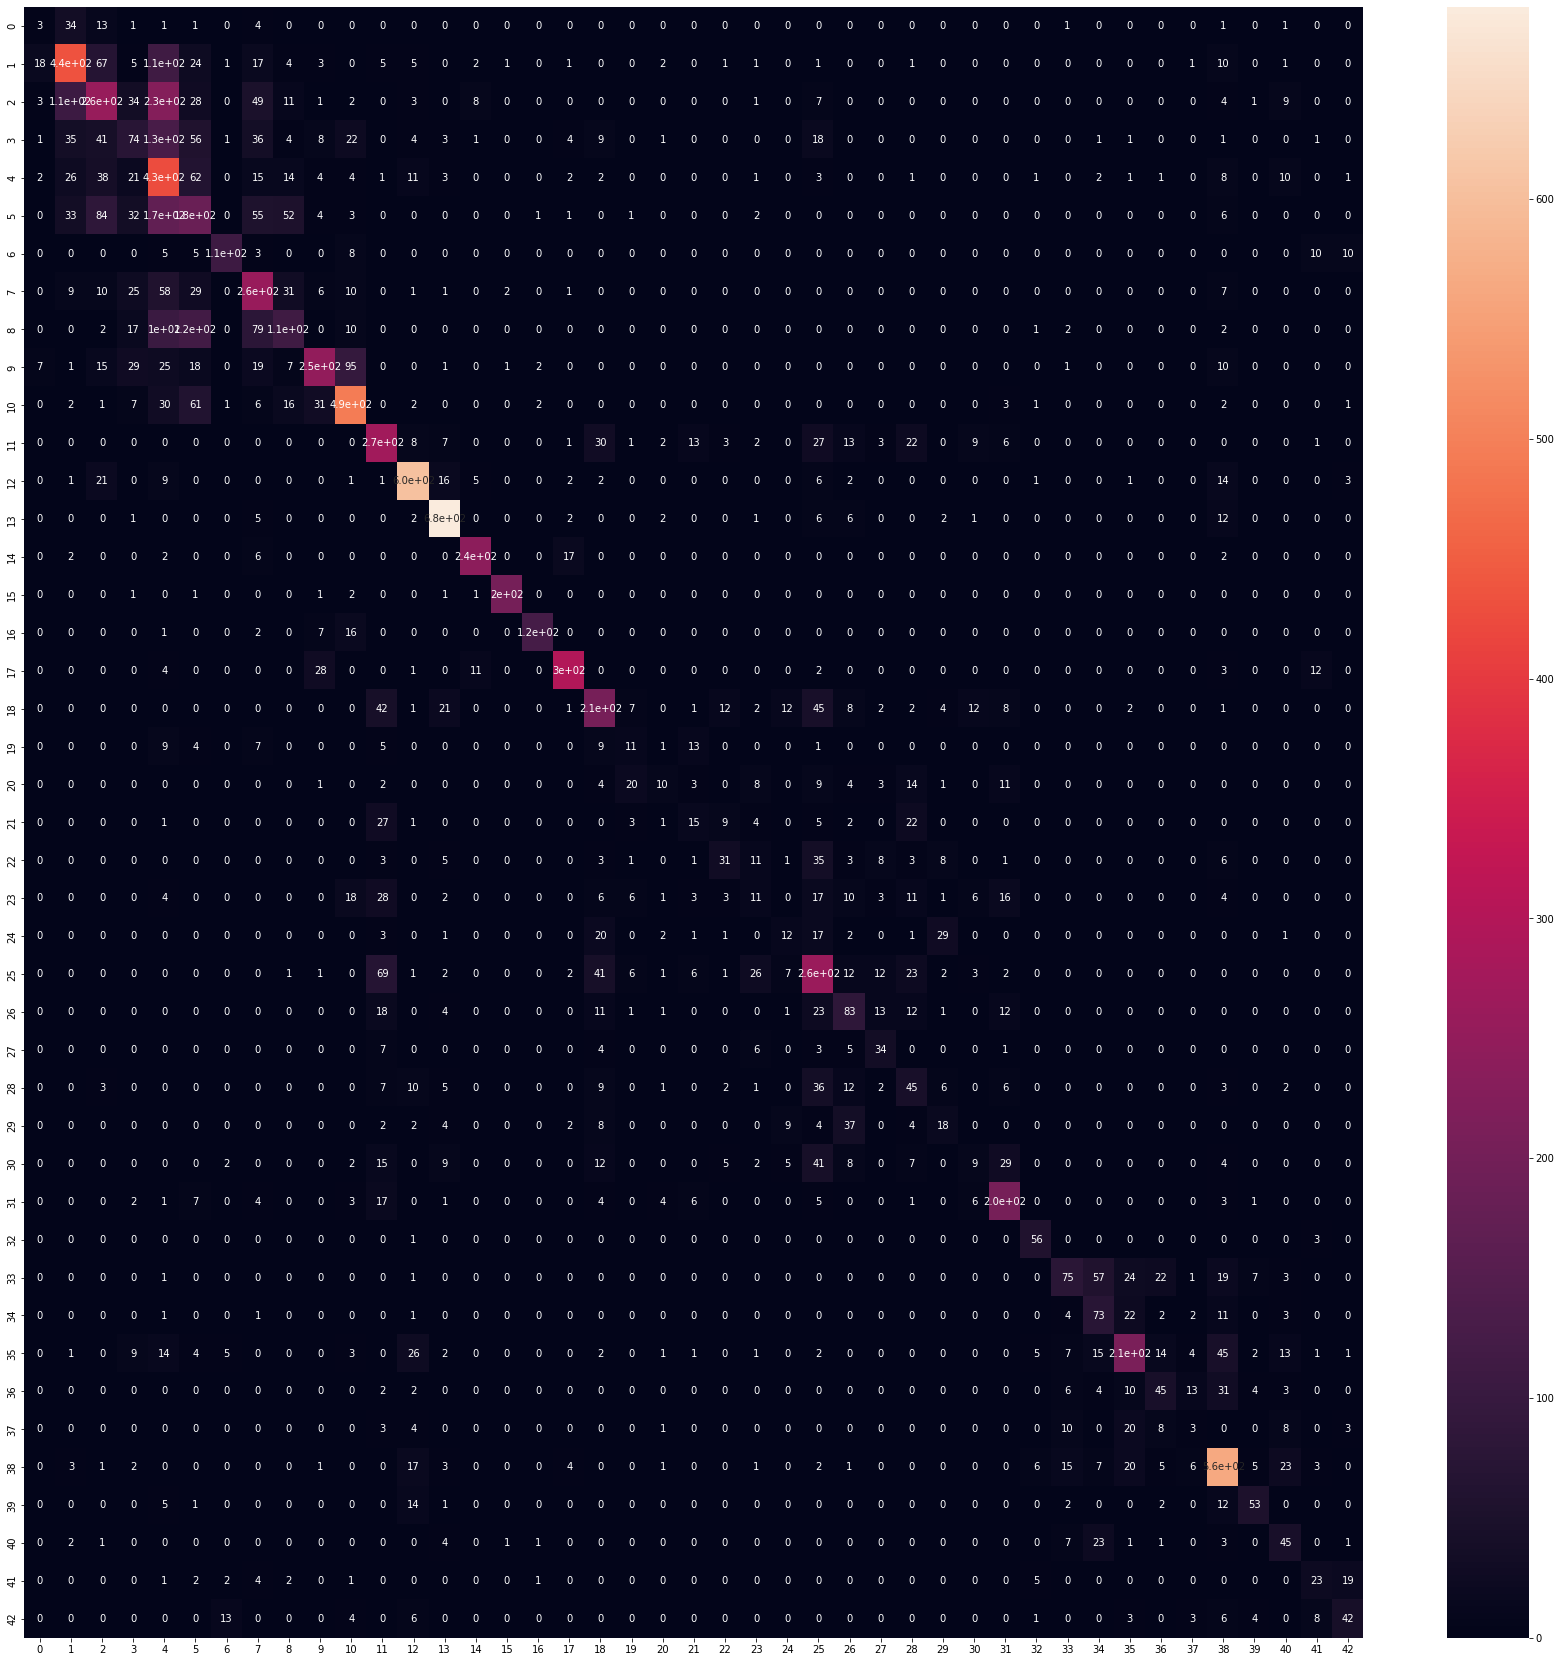

In [ ]:
df_cm_vgg = pd.DataFrame(cf_vgg, index = lables,  columns = lables)
plt.figure(figsize = (30,30))
sns.heatmap(df_cm_vgg, annot=True)
plt.savefig("conf_matrx_vgg.png")

# **Classification Report**

In [ ]:
print(classification_report(classes, pred_vgg_classes))

              precision    recall  f1-score   support

           0       0.09      0.05      0.06        60
           1       0.63      0.60      0.62       720
           2       0.46      0.34      0.39       750
           3       0.28      0.16      0.21       450
           4       0.32      0.65      0.43       660
           5       0.30      0.29      0.30       630
           6       0.81      0.73      0.77       150
           7       0.45      0.58      0.51       450
           8       0.45      0.25      0.32       450
           9       0.72      0.52      0.60       480
          10       0.71      0.75      0.73       660
          11       0.51      0.65      0.57       420
          12       0.83      0.88      0.85       690
          13       0.88      0.94      0.91       720
          14       0.90      0.89      0.89       270
          15       0.98      0.97      0.97       210
          16       0.95      0.83      0.88       150
          17       0.88    

# **Predictions on Test Data**

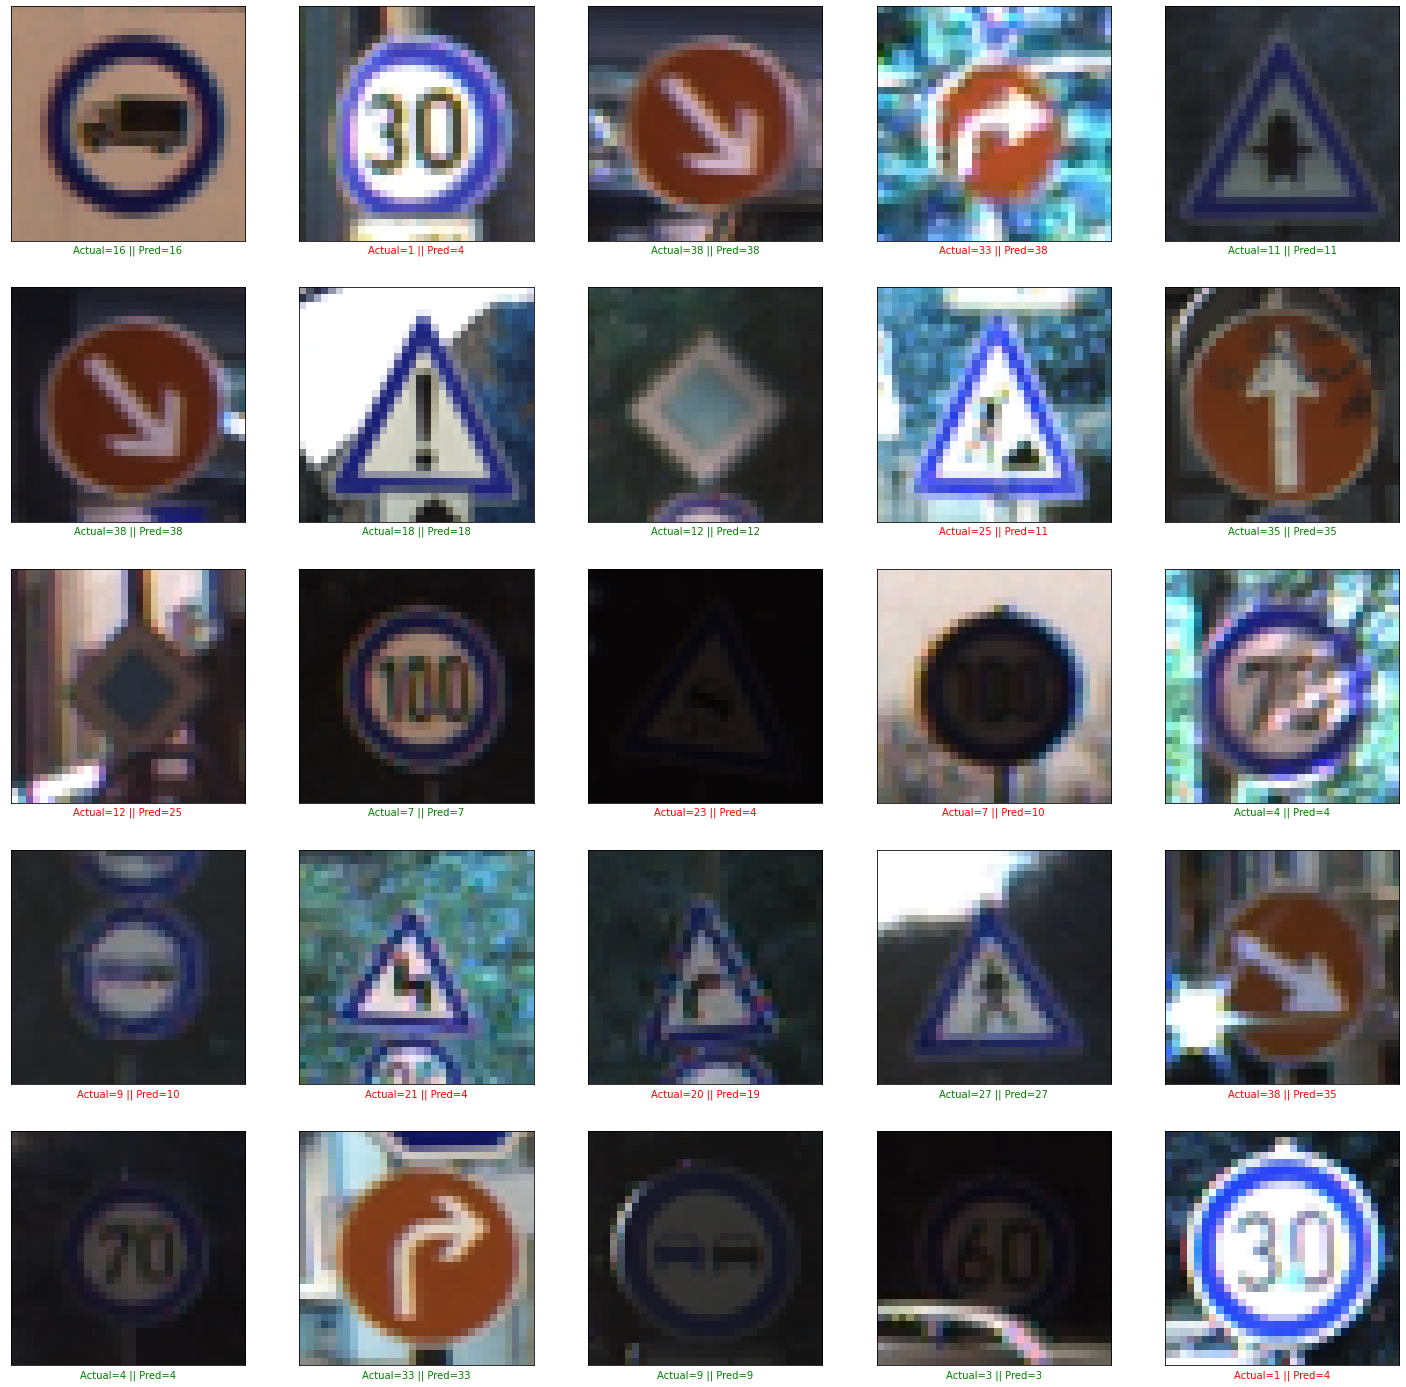

In [ ]:
plt.figure(figsize = (25, 25))

start_idx = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred_y_vgg = pred_vgg_classes[start_idx + i]
    actual_y_vgg = classes[start_idx + i]
    color = 'g'
    if pred_y_vgg != actual_y_vgg:
        color = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual_y_vgg, pred_y_vgg), color = color)
    plt.imshow(test_x[start_idx + i])
plt.show()